# Work Flow
---

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Read-in Data

In [2]:
housing = pd.read_csv('datasets/train.csv')
pd.set_option('display.max_columns', None)
housing.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## Data Cleaning

### Check Shape

In [3]:
housing.shape

(2051, 81)

In [4]:
# Calculate max number of features
np.sqrt(housing.shape[0])

45.28796749689701

### Cleaning Functions

In [5]:
def show_na_sum(df, column):
    return df[column].isna().sum()

In [6]:
def fix_na(df, column, value):
    df[column] = df[column].fillna(value)

In [7]:
def change_dtype(df, column, map_fxn):
    df[column] = df[column].map(map_fxn)

### Check for Null/Missing Values

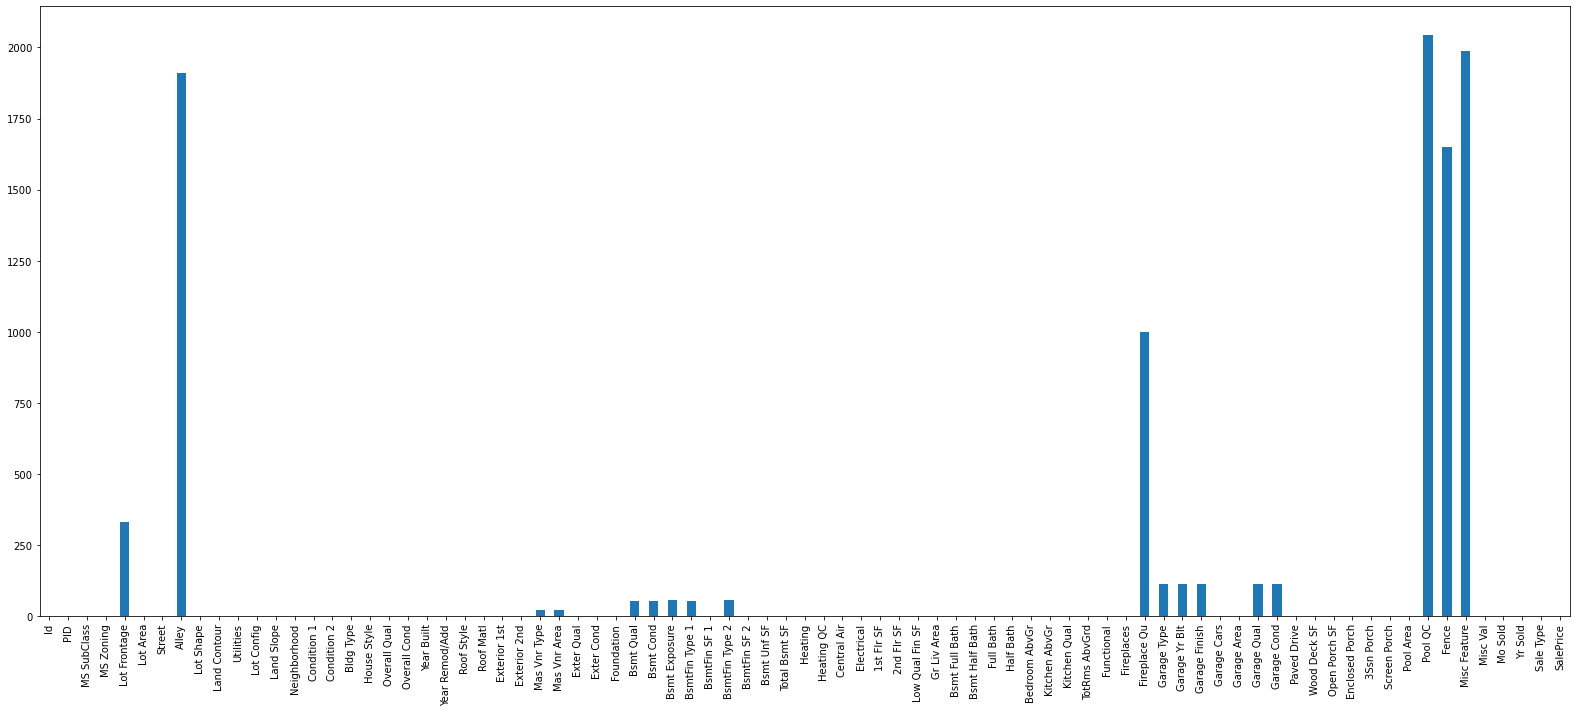

In [8]:
plt.figure(figsize=(22,10))
housing.isna().sum().plot(kind='bar')
plt.tight_layout();

There are visibly missing values for Lot Frontage, Alley, Mas Vnr Type, Mas Vnr Area, Bsmt Qual, Bsmt Cond, Basmt Exposure, BasmtFin Type 1, BsmtFin Type 2, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Fin, Garage Qual, Garage Cond, Pool QC, Fence, Misc Feature.

#### Lot Frontage

In [9]:
show_na_sum(housing, 'Lot Frontage')

330

In [10]:
housing[housing['Lot Frontage'].isna()]['MS Zoning'].value_counts()

RL    289
RM     25
FV     13
RH      3
Name: MS Zoning, dtype: int64

After exploring different features for this missing data (e.g. neighborhood, building class, zoning, lot area), it seemed like data was missing at random. Therefore null values will be filled with the mean.

In [11]:
housing['Lot Frontage'] = housing['Lot Frontage'].fillna(housing['Lot Frontage'].mean())

In [12]:
show_na_sum(housing, 'Lot Frontage')

0

#### Alley

In [13]:
show_na_sum(housing, 'Alley')

1911

In [14]:
housing['Alley'].value_counts()

Grvl    85
Pave    55
Name: Alley, dtype: int64

According to the data dictionary, 'Alley' should have three levels: Grvl, Pave, and NA. The NA (no access) variable has been replaced by NaN. The NaN will be filled with 'NA'.

In [15]:
housing['Alley'] = housing['Alley'].fillna('NA')

In [16]:
show_na_sum(housing, 'Alley')

0

#### Mas Vnr Type

In [17]:
show_na_sum(housing, 'Mas Vnr Type')

22

In [18]:
housing['Mas Vnr Type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

Because values cannot be imputed for categorical data and the rows cannot be dropped, these values will be filled in with None.

In [19]:
housing['Mas Vnr Type'] = housing['Mas Vnr Type'].fillna('None')

In [20]:
show_na_sum(housing, 'Mas Vnr Type')

0

#### Mas Vnr Area

In [21]:
show_na_sum(housing, 'Mas Vnr Area')

22

In [22]:
housing[housing['Mas Vnr Type'] == 'None']['Mas Vnr Area']

2       0.0
3       0.0
4       0.0
5       0.0
8       0.0
       ... 
2046    0.0
2047    0.0
2048    0.0
2049    0.0
2050    0.0
Name: Mas Vnr Area, Length: 1240, dtype: float64

In [23]:
housing['Mas Vnr Area'] = housing['Mas Vnr Area'].fillna(value = 0)

In [24]:
show_na_sum(housing, 'Mas Vnr Area')

0

#### Bsmt Qual

In [25]:
show_na_sum(housing, 'Bsmt Qual')

55

In [26]:
housing['Bsmt Qual'].value_counts()

TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: Bsmt Qual, dtype: int64

From the data dictionary, there should be a category 'NA' that means that a house has no basement. It was likely read-in as missing data by pandas. Missing values will be replaced with 'NA'.

In [27]:
housing['Bsmt Qual'] = housing['Bsmt Qual'].fillna('NA')

In [28]:
show_na_sum(housing, 'Bsmt Qual')

0

#### Bsmt Cond

In [29]:
show_na_sum(housing, 'Bsmt Cond')

55

In [30]:
housing['Bsmt Cond'].value_counts()

TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64

In [31]:
housing['Bsmt Cond'] = housing['Bsmt Cond'].fillna('NA')

In [32]:
show_na_sum(housing, 'Bsmt Cond')

0

#### Bsmt Exposure

In [33]:
show_na_sum(housing, 'Bsmt Exposure')

58

In [34]:
housing['Bsmt Exposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
Name: Bsmt Exposure, dtype: int64

There are only 55 houses listed as NA but 58 missing values here. For now, I will just fill these values in with 'NA'. 

In [35]:
housing['Bsmt Exposure'] = housing['Bsmt Exposure'].fillna('NA')

In [36]:
show_na_sum(housing, 'Bsmt Exposure')

0

#### BsmtFin Type 1

In [37]:
show_na_sum(housing, 'BsmtFin Type 1')

55

In [38]:
housing['BsmtFin Type 1'].value_counts()

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: BsmtFin Type 1, dtype: int64

In [39]:
housing['BsmtFin Type 1'] = housing['BsmtFin Type 1'].fillna('NA')

#### BsmtFin Type 2

In [40]:
show_na_sum(housing, 'BsmtFin Type 2')

56

In [41]:
housing['BsmtFin Type 2'].value_counts()

Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64

In [42]:
housing['BsmtFin Type 2'] = housing['BsmtFin Type 2'].fillna('NA')

#### Fireplace Qu

In [43]:
show_na_sum(housing, 'Fireplace Qu')

1000

In [44]:
housing[housing['Fireplaces']==0]['Fireplace Qu'].count()

0

Because there are 1000 houses listed as having 0 fireplaces and NaN for Fireplace Qu, I think that I can safely assume that the missing values should be 'NA'.

In [45]:
housing['Fireplace Qu'] = housing['Fireplace Qu'].fillna('NA')

In [46]:
show_na_sum(housing, 'Fireplace Qu')

0

#### Garage Type

In [47]:
show_na_sum(housing, 'Garage Type')

113

In [48]:
housing[housing['Garage Area']==0]['Id'].count()

113

In [49]:
housing['Garage Type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

In [50]:
housing['Garage Type'] = housing['Garage Type'].fillna('NA')

#### Garage Yr Built

In [51]:
show_na_sum(housing, 'Garage Yr Blt')

114

In [52]:
mask1 = housing['Garage Area'] != 0
mask2 = housing['Garage Yr Blt'].isna()

housing[mask1 & mask2]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


There is one house listed as having a detached garage tht is missing data for all other garage qualities. For now, these qualities will be listed as 'NA', but I might revisit it later.

In [53]:
housing['Garage Yr Blt'] = housing['Garage Yr Blt'].fillna('NA')

In [54]:
show_na_sum(housing, 'Garage Yr Blt')

0

#### Garage Finish

In [55]:
show_na_sum(housing, 'Garage Finish')

114

In [56]:
housing['Garage Finish'] = housing['Garage Finish'].fillna('NA')

#### Garage Qual

In [57]:
show_na_sum(housing, 'Garage Qual')

114

In [58]:
housing['Garage Qual'] = housing['Garage Qual'].fillna('NA')

In [59]:
show_na_sum(housing, 'Garage Qual')

0

#### Garage Cond

In [60]:
show_na_sum(housing, 'Garage Cond')

114

In [61]:
housing['Garage Cond'] = housing['Garage Cond'].fillna('NA')

In [62]:
show_na_sum(housing, 'Garage Cond')

0

#### Pool QC

In [63]:
show_na_sum(housing, 'Pool QC')

2042

In [64]:
housing['Pool QC'].value_counts()

Gd    4
Fa    2
TA    2
Ex    1
Name: Pool QC, dtype: int64

In [65]:
housing[housing['Pool Area'] == 0]['Id'].count()

2042

In [66]:
housing[housing['Pool Area'] == 0].count()['Id']/housing['Pool Area'].count()

0.9956118966357874

Almost 99.6% of the houses do not have pools. These missing values will be coded as 'NA' (No Pool). 

In [67]:
housing['Pool QC'] = housing['Pool QC'].fillna('NA')

In [68]:
show_na_sum(housing, 'Pool QC')

0

#### Fence

In [69]:
show_na_sum(housing, 'Fence')

1651

In [70]:
housing['Fence'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

In [71]:
housing['Fence'] = housing['Fence'].fillna('NA')

In [72]:
show_na_sum(housing, 'Fence')

0

#### Misc Feature

In [73]:
show_na_sum(housing, 'Misc Feature')

1986

In [74]:
housing['Misc Feature'].value_counts()

Shed    56
Gar2     4
Othr     3
Elev     1
TenC     1
Name: Misc Feature, dtype: int64

In [75]:
housing['Misc Feature'] = housing['Misc Feature'].fillna('NA')

In [76]:
show_na_sum(housing, 'Misc Feature')

0

#### Overall Check

In [77]:
def check_for_nulls(df):
    missing_list = []

    for column in df.columns:
        if df[column].isna().sum() > 0:
            missing_list.append(column)

    return missing_list

In [78]:
check_for_nulls(housing)

['BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Garage Cars',
 'Garage Area']

#### Basmt Fin SF 1

In [79]:
show_na_sum(housing, 'BsmtFin SF 1')

1

In [80]:
housing[housing['BsmtFin SF 1'].isna()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NA,NA,NA,NA,NaN,NA,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


In [81]:
housing['BsmtFin SF 1'] = housing['BsmtFin SF 1'].fillna(0)

In [82]:
show_na_sum(housing, 'BsmtFin SF 1')

0

#### BsmtFin SF 2

In [83]:
show_na_sum(housing, 'BsmtFin SF 2')

1

In [84]:
housing['BsmtFin SF 2'] = housing['BsmtFin SF 2'].fillna(0)

In [85]:
show_na_sum(housing, 'BsmtFin SF 2')

0

#### Bsmt Unf SF

In [86]:
show_na_sum(housing, 'Bsmt Unf SF')

1

In [87]:
housing['Bsmt Unf SF'] = housing['Bsmt Unf SF'].fillna(0)

In [88]:
show_na_sum(housing, 'Bsmt Unf SF')

0

#### Total Bsmt SF

In [89]:
show_na_sum(housing, 'Total Bsmt SF')

1

In [90]:
housing['Total Bsmt SF'] = housing['Total Bsmt SF'].fillna(0)

In [91]:
show_na_sum(housing, 'Total Bsmt SF')

0

#### Remaining NaN Values

Because all of the missing values were for the same house, I decided to fill na by row.

In [92]:
housing.loc[1327, :].fillna(0)

Id                   1342
PID             903230120
MS SubClass            20
MS Zoning              RM
Lot Frontage           99
                  ...    
Misc Val                0
Mo Sold                 4
Yr Sold              2008
Sale Type           ConLD
SalePrice           79000
Name: 1327, Length: 81, dtype: object

#### Overall Check #2

In [93]:
check_for_nulls(housing)

['Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area']

#### Bsmt Full Bath

In [94]:
housing[housing['Bsmt Full Bath'].isna()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
616,1498,908154080,20,RL,123.0,47007,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NA,NA,NA,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


In [95]:
housing['Bsmt Full Bath'] = housing['Bsmt Full Bath'].fillna(0)

#### Bsmt Half Bath

In [96]:
housing['Bsmt Half Bath'] = housing['Bsmt Half Bath'].fillna(0)

#### Garage Cars & Garage Area

In [97]:
show_na_sum(housing, ['Garage Cars', 'Garage Area'])

Garage Cars    1
Garage Area    1
dtype: int64

In [98]:
housing[housing['Garage Cars'].isna()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,NA,NA,NaN,NaN,NA,NA,Y,174,0,212,0,0,0,NA,MnPrv,NA,0,3,2007,WD,150909


In [99]:
housing[['Garage Cars', 'Garage Area']] = housing[['Garage Cars', 'Garage Area']].fillna(0)

#### Check for Nulls #3

In [100]:
check_for_nulls(housing)

[]

All null values have been cleaned.

### Check for Data Types

In [101]:
# housing.info()

#### Convert Int to String ('Id', 'PID', MS SubClass)

In [102]:
int_to_string = ['Id', 'PID', 'MS SubClass']

for item in int_to_string:
    change_dtype(housing, item, str)

#### Convert Month Int to Month Name

In [103]:
#housing['Mo Sold'].value_counts()

In [104]:
months = {1: 'January',
         2: 'February',
         3: 'March',
         4: 'April',
         5: 'May',
         6: 'June',
         7: 'July',
         8: 'August',
         9: 'September',
         10: 'October',
         11: 'November',
         12: 'December'}

change_dtype(housing, 'Mo Sold', months)

In [105]:
#housing['Mo Sold'].value_counts()

### Check for Unusual Values

#### Numerical Values

In [106]:
housing.describe()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,98.626524,442.084837,47.935641,567.451487,1057.471965,1164.488055,329.329108,5.512921,1499.330083,0.427109,0.063384,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1.775719,473.440761,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,2007.775719,181469.701609
std,21.306357,6742.488909,1.426271,1.104497,30.177889,21.036250,174.324690,461.195041,164.964052,445.022846,449.908003,396.446923,425.671046,51.068870,500.447829,0.522589,0.251590,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,0.765357,216.135102,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,1.312014,79258.659352
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,12789.000000
25%,60.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129825.000000
50%,69.055200,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.000000,994.000000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,162500.000000
75%,78.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,159.000000,733.500000,0.000000,811.000000,1318.500000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,2010.000000,611657.000000


In [107]:
# Investigate any values that seem out of the orinary

housing[housing['SalePrice'] == housing['SalePrice'].min()] # Quality is poor, seems to be okay

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1628,182,902207130,30,RM,68.0,9656,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,2,1923,1970,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,BrkTil,Fa,Fa,No,Unf,0.0,Unf,0.0,678.0,678.0,GasA,TA,N,SBrkr,832,0,0,832,0.0,0.0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1928,Unf,2.0,780.0,Fa,Fa,N,0,0,0,0,0,0,NA,NA,NA,0,June,2010,WD,12789


#### Categorical Values

In [108]:
#https://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical

categorical_vars = housing.select_dtypes(exclude = ['number'])

In [109]:
categorical_vars.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',
       'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence',
       'Misc Feature', 'Mo Sold', 'Sale Type'],
      dtype='object')

Identified Concerns:
* Neighborhood: Greens (3), GrnHill (2), and Landmark (1) not listed as possible values in data dictionary.

## Exploratory Data Analysis

### Graphing Functions

In [144]:
def create_scatter(df, x_col, y_col, title, x_label, y_label, marker_size = 4, color='mediumseagreen', plot_size = (10,6), hue = None):
    plt.figure(figsize=plot_size)
    sns.scatterplot(x = x_col, y = y_col, data = df, s=marker_size, color=color, hue = hue)
    plt.title(title, fontdict = {'fontsize': 14})
    plt.xlabel(x_label, fontdict = {'fontsize':13})
    plt.ylabel(y_label, fontdict = {'fontsize':13})
    plt.tight_layout;

In [125]:
def create_hist(feature, num_bins, title, x_label, y_label, color='mediumseagreen', edgecolor='black', plot_size = (10,6), grid = False):
    plt.figure(figsize=plot_size)
    feature.hist(bins = num_bins, color=color, edgecolor=edgecolor)
    plt.title(title, fontdict = {'fontsize': 14})
    plt.xlabel(x_label, fontdict = {'fontsize':13})
    plt.ylabel(y_label, fontdict = {'fontsize':13})
    plt.tight_layout;

In [181]:
def create_bar(df, x_col, y_col, title, x_label, y_label, hue=None, color = 'mediumseagreen', plot_size = (10,6), lw = 1.5):
    plt.figure(figsize=plot_size)
    sns.barplot(x = x_col, y = y_col, data = df, hue = hue, color = color, linewidth = lw, edgecolor = 'black')
    plt.title(title, fontdict = {'fontsize': 14})
    plt.xlabel(x_label, fontdict = {'fontsize':13})
    plt.ylabel(y_label, fontdict = {'fontsize':13})
    plt.tight_layout;

In [113]:
def create_count(df, x_col, title, x_label, color = 'mediumseagreen', plot_size = (10,6)):
    plt.figure(figsize = plot_size)
    sns.countplot(x=x_col, data = df, palette = 'viridis')
    plt.title(title, fontdict= {'fontsize':14})
    plt.xlabel(f'Number of {x_label} per Property', fontdict= {'fontsize':12})
    plt.ylabel('Number of Properties', fontdict= {'fontsize':12})

### Heatmap and Correlations

In [114]:
corr_matrix = housing.corr()[['SalePrice']].sort_values('SalePrice')

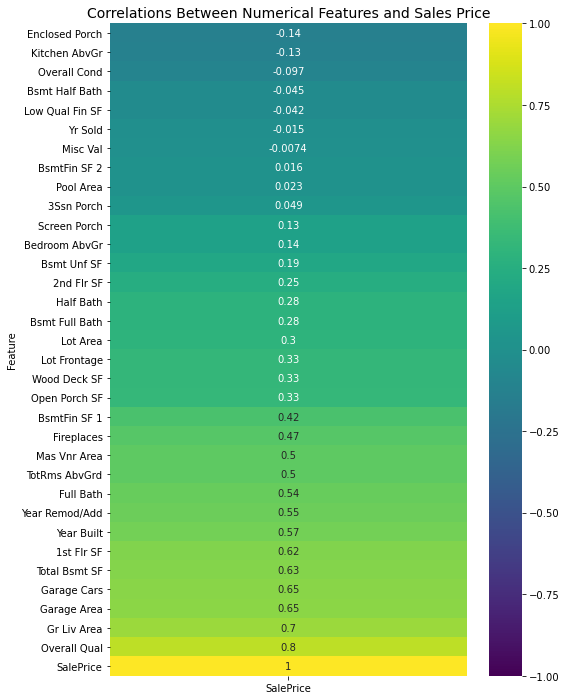

In [118]:
plt.figure(figsize=(8, 12))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = 'viridis')
plt.title('Correlations Between Numerical Features and Sales Price', fontdict={'fontsize':14})
plt.ylabel('Feature');

From the above heatmap, we can see that 'Overall' quality has the highest correlation with sales price. 

### Distributions of Variables

#### Target (Sale Price)

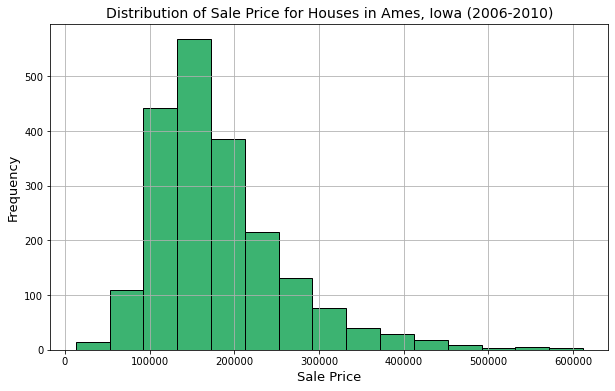

In [126]:
create_hist(housing['SalePrice'], 
            num_bins = 15, 
            title = 'Distribution of Sale Price for Houses in Ames, Iowa (2006-2010)',
           x_label = 'Sale Price',
           y_label = 'Frequency')

The distribution for the target is not normally distributed. It has a right skew.

#### Features

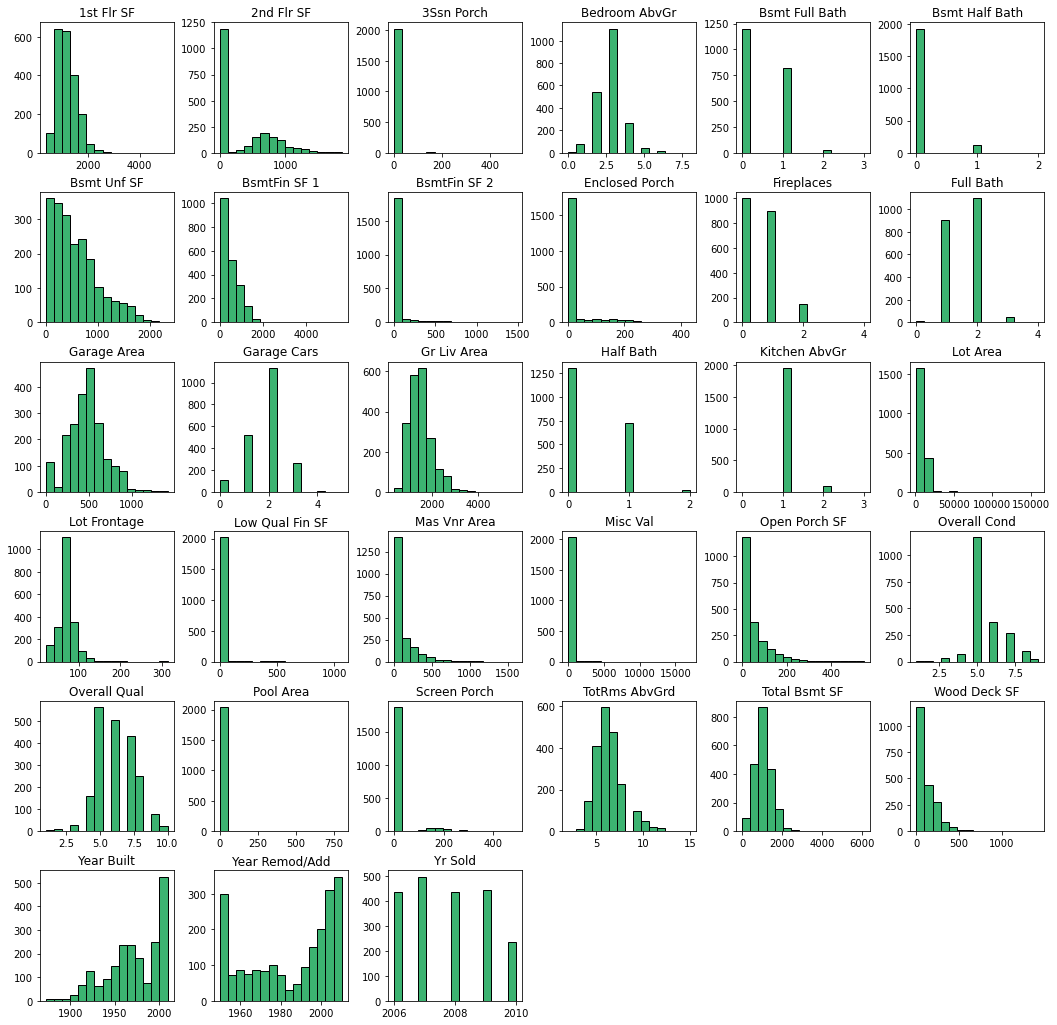

In [132]:
housing.drop(columns='SalePrice').hist(figsize=(18,18), bins = 15, edgecolor = 'black', grid = False, color = 'mediumseagreen')
plt.title('Distributions of Features');

The distributions for the majority of numeric features do not appear to be normally distributed. Only 'Total Bsmt SF' appears to have a norrrmal distribution.

### Visualizing Relationships between Features and Sales Price

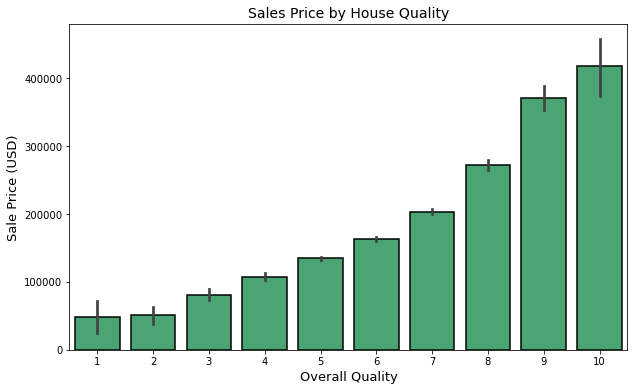

In [182]:
create_bar(housing, 'Overall Qual', 'SalePrice', title ='Sales Price by House Quality', x_label = 'Overall Quality', y_label = 'Sale Price (USD)')

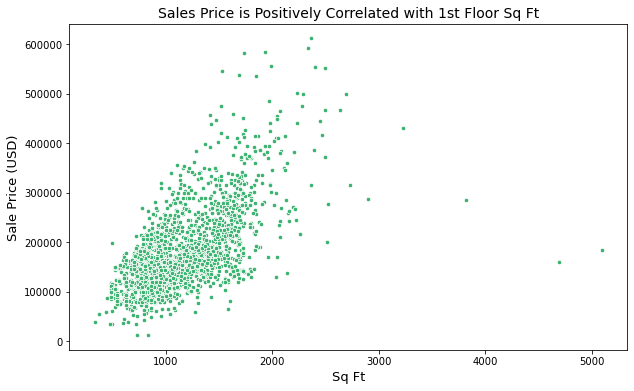

In [147]:
create_scatter(df = housing, x_col = '1st Flr SF', y_col = 'SalePrice', title = 'Sales Price is Positively Correlated with 1st Floor Sq Ft', x_label = 'Sq Ft', y_label = 'Sale Price (USD)', marker_size = 20)

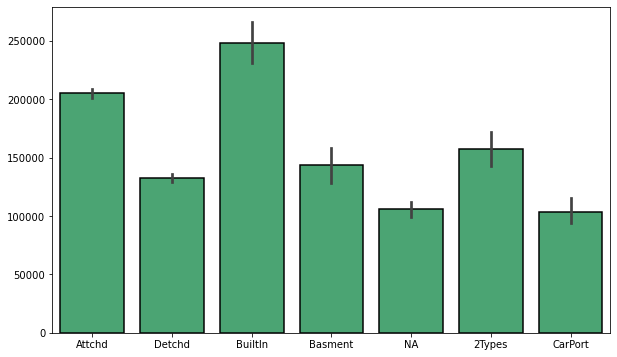

In [183]:
create_bar(housing, 'Garage Type', 'SalePrice', title='', x_label = '', y_label = '')

Houses with built-in garages had the highest sales prices. Built-in garages also have living space above them, so in addition to adding value through a garage, they can also add value through more liveable space.

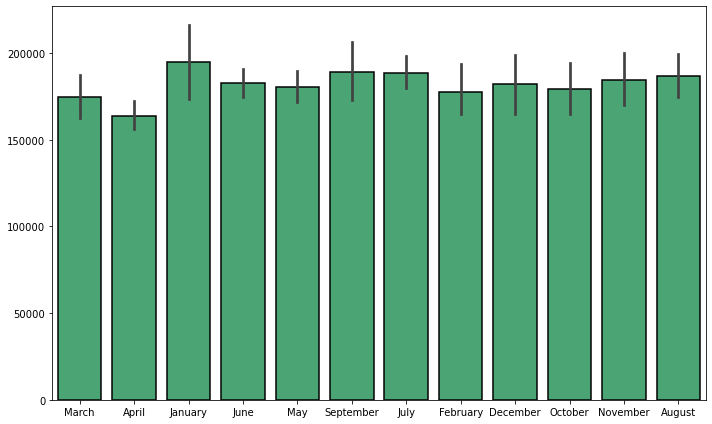

In [184]:
create_bar(housing, 'Mo Sold', 'SalePrice', title='', x_label = '', y_label = '')

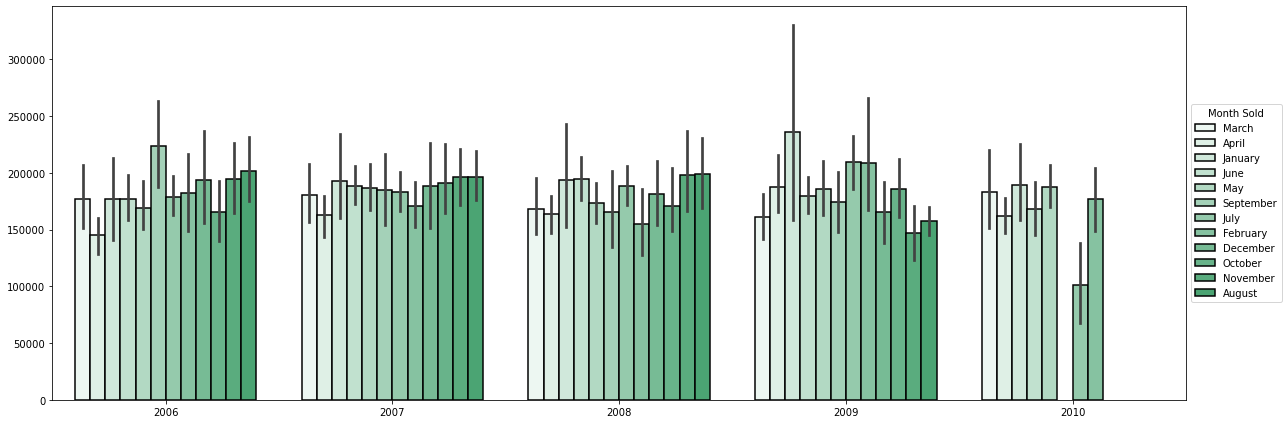

In [189]:
create_bar(housing, 'Yr Sold', 'SalePrice', title='', x_label = '', y_label = '', hue = 'Mo Sold', plot_size = (18, 6), color = 'mediumseagreen')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),title ='Month Sold')
plt.tight_layout()

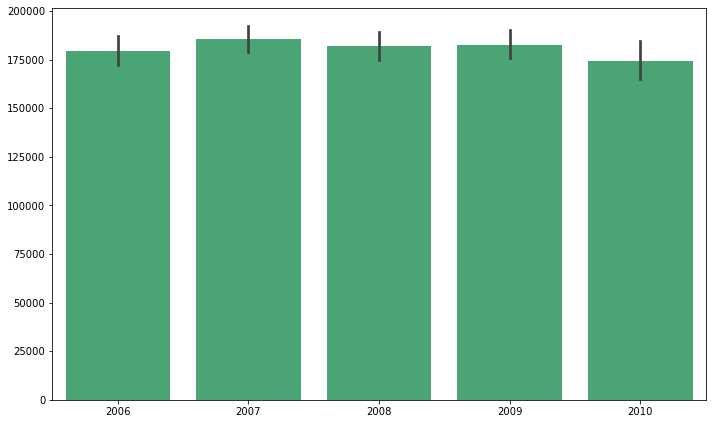

In [156]:
create_bar(housing, 'Yr Sold', 'SalePrice', title='', x_label = '', y_label = '')
plt.tight_layout()